In [1]:
%pylab inline
import os
import downglacier.sandbox.tcd_utils as utils
import seaborn as sns
import pickle
import downglacier.graphics
from statsmodels.tools import eval_measures as em
import pandas as pd
pal = sns.color_palette('deep')
sns.set_context("talk", font_scale=1.2)
sns.set_style("ticks")

Populating the interactive namespace from numpy and matplotlib


In [2]:
wd = os.path.join(utils.run_sensis(run=False), 'crossval')

In [3]:
def get_dirs(a_dir):
    return [name for name in os.listdir(a_dir) if os.path.isdir(os.path.join(a_dir, name))]
lexp = get_dirs(wd)
lexp = ['w0', 'w1', 'w2', 'w4', 'k4', 'k2']
labs = ['leave-1-out', 'leave-3-out', 'leave-5-out', 'leave-9-out', '4-fold', '2-fold']
vars = ['lwin',
 'lwout',
 'prcpsol',
 'qc',
 'ql',
 'qps',
 'qs',
 'subsurfmass',
 'swin',
 'swout',
 'vp',
 'ws',
 'mbtotfromsum']

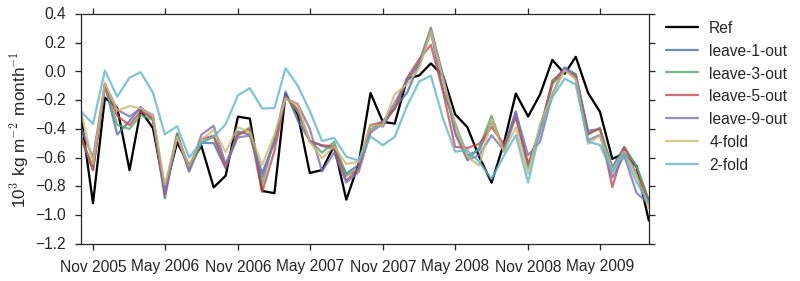

In [4]:
rmsds = pd.DataFrame()

with open(os.path.join(wd, lexp[0], 'diagnostics', 'results.p'), 'rb') as f:
    vc = pickle.load(f)
    vr = []
    for vn in vars:
        v = vc.getvar(vn, 4750, isdiag=vn == 'mbtotfromsum')
        data = v.ref_ts.values
        cv = v.fullmodel_ts.values
        vr.append(em.rmse(data, cv) / np.std(data))
    rmsds['full model'] = vr
    
fig = plt.figure(figsize=(11, 4), dpi=200)
for le, lab in zip(lexp, labs):
    with open(os.path.join(wd, le, 'diagnostics', 'results.p'), 'rb') as f:
        vc = pickle.load(f)
    v = vc.getvar('mbtotfromsum', 4750, isdiag=True)
    data = v.ref_ts.values / 1000.
    cv = v.outercv_ts.values / 1000.
    un = downglacier.graphics.__parseunit(v.units   )
    un = '10$^{3}$ ' + un
    
    if le == 'w0':
        plt.plot(v.ref_ts.index, data, color='k', label='Ref')
    plt.plot(v.ref_ts.index, cv, label=lab, alpha=0.8)
    
    vr = []
    for vn in vars:
        v = vc.getvar(vn, 4750, isdiag=vn == 'mbtotfromsum')
        data = v.ref_ts.values
        cv = v.outercv_ts.values
        vr.append(em.rmse(data, cv) / np.std(data))
    rmsds[lab] = vr

plt.ylabel(un)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.);
plt.tight_layout()
plt.subplots_adjust(right=0.82)
plt.savefig(os.path.join(utils.get_plot_dir(), 'response_crossval_ts.pdf'))

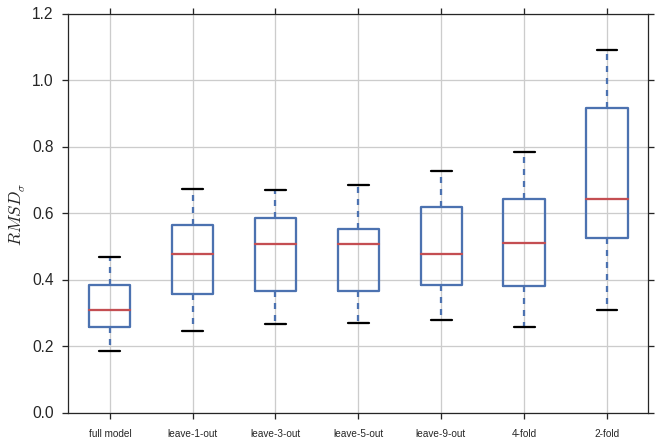

In [5]:
rmsds.boxplot(return_type='axes');
plt.ylabel('$RMSD_{\sigma}$');
plt.savefig(os.path.join(utils.get_plot_dir(), 'response_crossval_boxplot.pdf'))